Saving download.jpeg to download.jpeg
🖼️ Image: download.jpeg
💬 Caption: a black and white dog playing in the water 


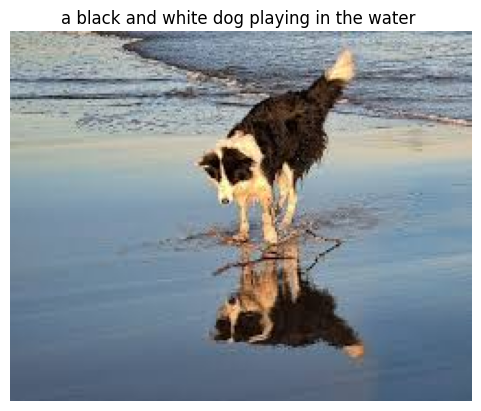

In [4]:
# ===============================================
# 📘 REAL IMAGE CAPTION GENERATOR (HUGGINGFACE MODEL)
# ===============================================

!pip install transformers torch pillow matplotlib

from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
from PIL import Image
import torch
import matplotlib.pyplot as plt

# Load pretrained model (Vision Transformer + GPT2)
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Caption generation function
def generate_caption(image_path):
    img = Image.open(image_path).convert("RGB")
    pixel_values = feature_extractor(images=img, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    output_ids = model.generate(pixel_values, max_length=16, num_beams=4)
    preds = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return preds

# ===============================================
# 📷 Upload your image and test
# ===============================================
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    caption = generate_caption(fn)
    print(f"🖼️ Image: {fn}")
    print(f"💬 Caption: {caption}")

    # Show image
    img = Image.open(fn)
    plt.imshow(img)
    plt.title(caption)
    plt.axis("off")
    plt.show()
